
### COVID-19 Risky cities in Nuevo Leon and healthcare


# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import json
!pip install geocoder
import geocoder as geocoder
!pip install geopy
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install folium
import folium

print ('Libraries imported')

Libraries imported


## 2. Build Dataframe

2. Build Dataframe
The NL government website archives COVID-19 statistics data.  The data contains the name of cities in Nuevo Leon, Mexico, populations and total COVID-19 cases in each city. We will use these datasets later.

Sources

I download both of the links 

https://coronavirus.gob.mx/datos/#DownZCSV

https://es.wikipedia.org/wiki/Anexo:Municipios_de_Nuevo_Le%C3%B3n

In [2]:
df1 = pd.read_csv(r'C:\Users\carlo\Desktop\Casos_Diarios_Municipio_Confirmados_20200726.csv')
df2 = pd.read_excel(r'C:\Users\carlo\Desktop\Municipios NL.xlsx' )

In [3]:
df1.head()

,cve_ent,poblacion,Municipio,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,18-07-2020,19-07-2020,20-07-2020,21-07-2020,22-07-2020,23-07-2020,24-07-2020,25-07-2020,26-07-2020,Total
0,16046,15290,Juarez,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,46
1,16047,22358,Jungapeo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
2,16048,5862,Lagunillas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16049,18769,Madero,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,14
4,5035,744247,Torreon,0,0,0,0,0,0,0,...,19,17,39,60,29,18,19,0,0,3260


In [4]:
df2.head()

,Clave INEGI,Nombre,Municipio,Unnamed: 3,City,Fecha de creación
0,1,Abasolo,Abasolo,"Nuevo Leon, Mexico","Abasolo,Nuevo Leon, Mexico",1825.0
1,2,Agualeguas,Agualeguas,"Nuevo Leon, Mexico","Agualeguas,Nuevo Leon, Mexico",1825.0
2,3,Los Aldamas,Los Aldamas,"Nuevo Leon, Mexico","Los Aldamas,Nuevo Leon, Mexico",1825.0
3,4,Allende,Ciudad de Allende,"Nuevo Leon, Mexico","Ciudad de Allende,Nuevo Leon, Mexico",1850.0
4,5,Anáhuac,Anáhuac,"Nuevo Leon, Mexico","Anáhuac,Nuevo Leon, Mexico",1934.0


In [5]:
Results  = pd.merge(df1,df2, on='Municipio')
Results.head()


,cve_ent,poblacion,Municipio,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,23-07-2020,24-07-2020,25-07-2020,26-07-2020,Total,Clave INEGI,Nombre,Unnamed: 3,City,Fecha de creación
0,19002,2599,Agualeguas,0,0,0,0,0,0,0,...,0,1,0,0,4,2,Agualeguas,"Nuevo Leon, Mexico","Agualeguas,Nuevo Leon, Mexico",1825.0
1,19003,1506,Los Aldamas,0,0,0,0,0,0,0,...,0,0,0,0,1,3,Los Aldamas,"Nuevo Leon, Mexico","Los Aldamas,Nuevo Leon, Mexico",1825.0
2,19013,11962,China,0,0,0,0,0,0,0,...,0,0,0,0,43,13,China,"Nuevo Leon, Mexico","China,Nuevo Leon, Mexico",1825.0
3,19014,37859,Doctor Arroyo,0,0,0,0,0,0,0,...,0,0,0,0,59,14,Doctor Arroyo,"Nuevo Leon, Mexico","Doctor Arroyo,Nuevo Leon, Mexico",1851.0
4,19015,1845,Doctor Coss,0,0,0,0,0,0,0,...,0,0,0,0,3,15,Doctor Coss,"Nuevo Leon, Mexico","Doctor Coss,Nuevo Leon, Mexico",1882.0


In [6]:
df = Results.groupby("City").agg(sum)
df.reset_index(inplace=True)
df

,City,cve_ent,poblacion,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,19-07-2020,20-07-2020,21-07-2020,22-07-2020,23-07-2020,24-07-2020,25-07-2020,26-07-2020,Total,Fecha de creación
0,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,2,6,3,3,1,2,0,0,113,7300.0
1,"Agualeguas,Nuevo Leon, Mexico",19002,2599,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4,1825.0
2,"Aramberri,Nuevo Leon, Mexico",19007,17800,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,17,1877.0
3,"Bustamante,Nuevo Leon, Mexico",47014,12830,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,3664.0
4,"Carmen,Nuevo Leon, Mexico",4003,275478,0,0,0,0,0,0,0,...,8,20,26,19,12,10,0,0,1456,1852.0
5,"China,Nuevo Leon, Mexico",19013,11962,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,43,1825.0
6,"Doctor Arroyo,Nuevo Leon, Mexico",19014,37859,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,59,1851.0
7,"Doctor Coss,Nuevo Leon, Mexico",19015,1845,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1882.0
8,"Galeana,Nuevo Leon, Mexico",27040,52045,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,86,3754.0
9,"General Bravo,Nuevo Leon, Mexico",19020,6127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,46,1868.0


In [7]:
CLIENT_ID = 'QB1IVY2TQKULYUZOT3EQOJLNNFZUEKW3RRZVPGF4XERULEOD' # your Foursquare ID
CLIENT_SECRET = '2UOAHRTUJJFRY0OGN4KTZDGNJ2BE50H3G2OI5M2IJ1GDF14K' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QB1IVY2TQKULYUZOT3EQOJLNNFZUEKW3RRZVPGF4XERULEOD
CLIENT_SECRET:2UOAHRTUJJFRY0OGN4KTZDGNJ2BE50H3G2OI5M2IJ1GDF14K


### 3. Get City Coordinates
I use Geocoder to find geographic locations for the obtained cities aboves

In [8]:
def getLatLong(row):
    lat_lng_coords = None
    search_query = '{}, Monterrey,Mex'.format(row)
    try:
        while(lat_lng_coords is None):
            g = geocoder.arcgis(search_query)
            lat_lng_coords = g.latlng
    except IndexError:
        latitude = 0.0
        longitude = 0.0
        print('BACKUP')
        return [latitude,longitude]

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    print(latitude, longitude)
    return [latitude, longitude]

coords_list = df['City'].apply(getLatLong).tolist()

25.70032918972094 -100.35547220667284
26.308298643494034 -99.54682458640987
25.644610000000057 -100.29584999999997
25.737520583069433 -100.33353396290464
25.670000000000073 -100.35758999999996
25.644610000000057 -100.29584999999997
25.730665133042002 -100.33020549721992
25.709449068001252 -100.30290318718892
25.731355049987954 -100.3317549267466
25.665535023745868 -100.33593992718306
25.688640000000078 -100.30792999999994
25.73827051084361 -100.33629985448292
25.680359777776644 -100.3079079783734
25.76451000000003 -100.39954999999998
25.707300000000032 -100.32060999999999
25.733647390488642 -100.32114989139193
24.87898545805285 -99.6698002551803
25.690524331220022 -100.30059275981085
27.017890000000023 -100.50876999999997
25.644610000000057 -100.29584999999997
25.67350005296688 -100.32192492406904
25.785750039287727 -100.41314991210268
25.737549496533287 -100.34177865768736
25.70150374778622 -100.35861209301112
25.740049680976885 -100.33508459516734
25.639307369645003 -100.301272938389

In [9]:
df[['City Latitude', 'City Longitude']] = pd.DataFrame(coords_list, columns = ['Latitude', 'Longitude'])
df

,City,cve_ent,poblacion,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,21-07-2020,22-07-2020,23-07-2020,24-07-2020,25-07-2020,26-07-2020,Total,Fecha de creación,City Latitude,City Longitude
0,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,3,3,1,2,0,0,113,7300.0,25.700329,-100.355472
1,"Agualeguas,Nuevo Leon, Mexico",19002,2599,0,0,0,0,0,0,0,...,0,0,0,1,0,0,4,1825.0,26.308299,-99.546825
2,"Aramberri,Nuevo Leon, Mexico",19007,17800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,17,1877.0,25.644610,-100.295850
3,"Bustamante,Nuevo Leon, Mexico",47014,12830,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,3664.0,25.737521,-100.333534
4,"Carmen,Nuevo Leon, Mexico",4003,275478,0,0,0,0,0,0,0,...,26,19,12,10,0,0,1456,1852.0,25.670000,-100.357590
5,"China,Nuevo Leon, Mexico",19013,11962,0,0,0,0,0,0,0,...,0,0,0,0,0,0,43,1825.0,25.644610,-100.295850
6,"Doctor Arroyo,Nuevo Leon, Mexico",19014,37859,0,0,0,0,0,0,0,...,0,0,0,0,0,0,59,1851.0,25.730665,-100.330205
7,"Doctor Coss,Nuevo Leon, Mexico",19015,1845,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1882.0,25.709449,-100.302903
8,"Galeana,Nuevo Leon, Mexico",27040,52045,0,0,0,0,0,0,0,...,0,0,0,0,0,0,86,3754.0,25.731355,-100.331755
9,"General Bravo,Nuevo Leon, Mexico",19020,6127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,46,1868.0,25.665535,-100.335940


## 4. Binning the COVID-19 Cases
Let's visualize the total cases in each city by deploying bar graph. Then we devide the data into four bins


In [10]:
# Change the "Total Cases" column type from object to integer
df["Total"] = df["Total"].astype(str).astype(int)

# Generate 5 pins by categorizing total cases
bins = np.linspace(min(df["Total"]), max(df["Total"]), 5)
bins

array([   0., 1172., 2344., 3516., 4688.])

In [11]:

group_names = ['Low Risk', 'Medium Risk', 'High Risk', 'Extreme High Risk']
df['Risk Level'] = pd.cut(df['Total'], bins, labels=group_names, include_lowest=True )
df.head()

,City,cve_ent,poblacion,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,22-07-2020,23-07-2020,24-07-2020,25-07-2020,26-07-2020,Total,Fecha de creación,City Latitude,City Longitude,Risk Level
0,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,3,1,2,0,0,113,7300.0,25.700329,-100.355472,Low Risk
1,"Agualeguas,Nuevo Leon, Mexico",19002,2599,0,0,0,0,0,0,0,...,0,0,1,0,0,4,1825.0,26.308299,-99.546825,Low Risk
2,"Aramberri,Nuevo Leon, Mexico",19007,17800,0,0,0,0,0,0,0,...,0,0,0,0,0,17,1877.0,25.644610,-100.295850,Low Risk
3,"Bustamante,Nuevo Leon, Mexico",47014,12830,0,0,0,0,0,0,0,...,0,0,0,0,0,8,3664.0,25.737521,-100.333534,Low Risk
4,"Carmen,Nuevo Leon, Mexico",4003,275478,0,0,0,0,0,0,0,...,19,12,10,0,0,1456,1852.0,25.670000,-100.357590,Medium Risk


In [12]:
df[['City','Total', 'City Latitude' ,'City Longitude','Risk Level']]

,City,Total,City Latitude,City Longitude,Risk Level
0,"Abasolo,Nuevo Leon, Mexico",113,25.700329,-100.355472,Low Risk
1,"Agualeguas,Nuevo Leon, Mexico",4,26.308299,-99.546825,Low Risk
2,"Aramberri,Nuevo Leon, Mexico",17,25.644610,-100.295850,Low Risk
3,"Bustamante,Nuevo Leon, Mexico",8,25.737521,-100.333534,Low Risk
4,"Carmen,Nuevo Leon, Mexico",1456,25.670000,-100.357590,Medium Risk
5,"China,Nuevo Leon, Mexico",43,25.644610,-100.295850,Low Risk
6,"Doctor Arroyo,Nuevo Leon, Mexico",59,25.730665,-100.330205,Low Risk
7,"Doctor Coss,Nuevo Leon, Mexico",3,25.709449,-100.302903,Low Risk
8,"Galeana,Nuevo Leon, Mexico",86,25.731355,-100.331755,Low Risk
9,"General Bravo,Nuevo Leon, Mexico",46,25.665535,-100.335940,Low Risk


In [13]:

# Lets examine the number of cities falls into each bin
print(df["Risk Level"].value_counts())

Low Risk             29
Extreme High Risk     1
High Risk             1
Medium Risk           1
Name: Risk Level, dtype: int64


## 5. Visualize the Bins

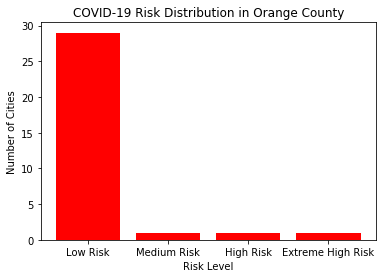

In [14]:
# Create bar chart to visualize the risk distributions in Orange County
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(group_names, df["Risk Level"].value_counts(), color = 'r')

plt.pyplot.title('COVID-19 Risk Distribution in Orange County') 
plt.pyplot.ylabel('Number of Cities')
plt.pyplot.xlabel('Risk Level') 

plt.pyplot.show()

## 6. Identify Local Hospitals Using Foursqure

In [15]:
mty_lat = 25.6887861
mty_lng = -100.3500984
search_query = 'Hospital'
radius = 5000

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    mty_lat, 
    mty_lng, 
    VERSION, 
    search_query, 
    radius, 
    LIMIT)
url

results_hospital = requests.get(url).json()
results_hospital

{'meta': {'code': 200, 'requestId': '5f1fd221195236547067edd4'},
 'response': {'venues': [{'id': '4cdc0b2d6ad1a0932460ef56',
    'name': 'Hospital Universitario (UANL)',
    'location': {'address': 'Av. Francisco I. Madero S/N',
     'crossStreet': 'José Eleuterio González (Gonzalitos)',
     'lat': 25.689160513226717,
     'lng': -100.35029110029933,
     'labeledLatLngs': [{'label': 'display',
       'lat': 25.689160513226717,
       'lng': -100.35029110029933}],
     'distance': 45,
     'postalCode': '64460',
     'cc': 'MX',
     'city': 'Monterrey',
     'state': 'Nuevo León',
     'country': 'México',
     'formattedAddress': ['Av. Francisco I. Madero S/N (José Eleuterio González (Gonzalitos))',
      '64460 Monterrey, Nuevo León',
      'México']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
    

In [16]:
venues = results_hospital['response']['venues']
results_hospital = json_normalize(venues)
print(results_hospital.shape)
results_hospital.head()

(30, 19)


C:\Users\carlo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4cdc0b2d6ad1a0932460ef56,Hospital Universitario (UANL),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1595920964,False,Av. Francisco I. Madero S/N,José Eleuterio González (Gonzalitos),25.689161,-100.350291,"[{'label': 'display', 'lat': 25.68916051322671...",45,64460,MX,Monterrey,Nuevo León,México,[Av. Francisco I. Madero S/N (José Eleuterio G...,NaN,NaN
1,4d61b82a9f67f04dbcc087fb,Doctors Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1595920964,False,Ecuador 2331,Bolivia,25.684624,-100.356103,"[{'label': 'display', 'lat': 25.68462353789592...",759,64620,MX,Monterrey,Nuevo León,México,"[Ecuador 2331 (Bolivia), 64620 Monterrey, Nuev...",38744845,NaN
2,4e5fead2c65b2dc89e86688b,Urgencias (Hospital Universitario),"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",v-1595920964,False,NaN,NaN,25.688832,-100.349578,"[{'label': 'display', 'lat': 25.68883175363469...",52,64460,MX,Monterrey,Nuevo León,México,"[64460 Monterrey, Nuevo León, México]",NaN,NaN
3,51c05ce3498e2bd1d044a30c,"Centro de Fototerapia, Láser e Investigación C...","[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1595920964,False,Av. Francisco I. Madero S/N,José Eleuterio González (Gonzalitos),25.689218,-100.349863,"[{'label': 'display', 'lat': 25.68921848558906...",53,NaN,MX,Monterrey,Nuevo León,México,[Av. Francisco I. Madero S/N (José Eleuterio G...,NaN,NaN
4,4ff22d63e4b04071c02c48ab,Tococirugía (Hospital Universitario),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1595920964,False,NaN,NaN,25.688944,-100.349464,"[{'label': 'display', 'lat': 25.68894377231034...",66,NaN,MX,Monterrey,Nuevo León,México,"[Monterrey, Nuevo León, México]",NaN,NaN


In [17]:

# The dataframe needs to be cleaned.
# We want to keep only hospital name and location. 

filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
results_hospital = results_hospital.loc[:, filtered_columns]
print(results_hospital.shape)
results_hospital.head()

(30, 4)


,name,categories,location.lat,location.lng
0,Hospital Universitario (UANL),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",25.689161,-100.350291
1,Doctors Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",25.684624,-100.356103
2,Urgencias (Hospital Universitario),"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",25.688832,-100.349578
3,"Centro de Fototerapia, Láser e Investigación C...","[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",25.689218,-100.349863
4,Tococirugía (Hospital Universitario),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",25.688944,-100.349464


In [18]:
# Identify Animal hospitals and drop them off the dataframe.

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
results_hospital['categories'] = results_hospital.apply(get_category_type, axis=1)
results_hospital.columns = [column.split('.')[-1] for column in results_hospital.columns]

# Include only Hospitals and Medical Centers
results_hospital = results_hospital[(results_hospital.categories == 'Hospital') | (results_hospital.categories == 'Medical Center')]

# Exclude hospital names that contain animal, pet, etc.
results_hospital = results_hospital[~results_hospital['name'].str.contains('Animal')]
results_hospital = results_hospital[~results_hospital['name'].str.contains('Pet')]
results_hospital = results_hospital[~results_hospital['name'].str.contains('Veterinary')]

results_hospital = results_hospital.reset_index(drop = True)
print(results_hospital.shape)
results_hospital.head()

(23, 4)


,name,categories,lat,lng
0,Hospital Universitario (UANL),Hospital,25.689161,-100.350291
1,Doctors Hospital,Hospital,25.684624,-100.356103
2,"Centro de Fototerapia, Láser e Investigación C...",Hospital,25.689218,-100.349863
3,Tococirugía (Hospital Universitario),Hospital,25.688944,-100.349464
4,Torre de Pediatría (Hospital Universitario),Hospital,25.688907,-100.349703


In [19]:

def getNearbyHospital(names, latitudes, longitudes, radius=5000):
    
    hospitals_list=[] 
    search_query = 'Hospital'
    
    # create the API request URL
    for name, lat, lng in zip(names, latitudes, longitudes):
        LIMIT=100
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
           CLIENT_ID, 
           CLIENT_SECRET, 
           lat, 
           lng, 
           VERSION, 
           search_query, 
           radius, 
           LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        #res = results_hos[0]
        #print(res.keys())
        #print((results_hos[0]))

        # return only relevant information for each nearby venue
        hospitals_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],
            v['categories']) for v in results])
        #print (hospitals_list)

    hospitals = pd.DataFrame([hospital for hospital_list in hospitals_list for hospital in hospital_list])
    hospitals.columns = ['City',
                         'City Latitude',
                         'City Longitude',
                         'Hospital', 
                         'Hospital Latitude',
                         'Hospital Longitude',
                         'Categories']
    
    #return(dataframe_filtered)
    return hospitals

In [20]:
local_hospitals = getNearbyHospital(names=df['City'], 
                                  latitudes=df['City Latitude'], 
                                   longitudes=df['City Longitude'], 
                                   radius=5000)
print(local_hospitals.shape)
local_hospitals.head()

(1262, 7)


,City,City Latitude,City Longitude,Hospital,Hospital Latitude,Hospital Longitude,Categories
0,"Abasolo,Nuevo Leon, Mexico",25.700329,-100.355472,Hospital Secc 50,25.709606,-100.347630,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H..."
1,"Abasolo,Nuevo Leon, Mexico",25.700329,-100.355472,Doctors Hospital,25.684624,-100.356103,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H..."
2,"Abasolo,Nuevo Leon, Mexico",25.700329,-100.355472,Hospital Universitario (UANL),25.689161,-100.350291,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H..."
3,"Abasolo,Nuevo Leon, Mexico",25.700329,-100.355472,Metrorrey (Estación Hospital),25.691926,-100.344120,"[{'id': '4bf58dd8d48988d1fc931735', 'name': 'L..."
4,"Abasolo,Nuevo Leon, Mexico",25.700329,-100.355472,Tococirugía (Hospital Universitario),25.688944,-100.349464,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H..."


In [21]:
# Identify results categories

def get_Category_type(row):
    try:
        categories_list = row['Categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
local_hospitals['Categories'] = local_hospitals.apply(get_Category_type, axis=1)
local_hospitals.columns = [column.split('.')[-1] for column in local_hospitals.columns]

# Include only Hospitals and Medical Centers
local_hospitals = local_hospitals[(local_hospitals['Categories'] == 'Hospital') | (local_hospitals['Categories'] == 'Medical Center')]

# Exclude hospital names that contain animal, pet, etc.
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Animal', 'animal')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Pet', 'pet')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Vet', 'vet')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Floor', 'floor')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Room', 'room')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Delivery', 'delivery')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Lab',' lab')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Cafe', 'cafe')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Lobby',' lobby')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Department', 'department')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Institude', 'institude')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Service', 'service')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Program', 'program')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Rehab', 'rehab')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Pick', 'pick')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Classroom', 'classroom')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('West', 'west')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('East', 'east')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('North', 'north')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('South', 'south')]
local_hospitals = local_hospitals[~local_hospitals['Hospital'].str.contains('Boardroom', 'boardroom')]

local_hospitals = local_hospitals.reset_index(drop = True)
print(local_hospitals.shape)
local_hospitals

(721, 7)


,City,City Latitude,City Longitude,Hospital,Hospital Latitude,Hospital Longitude,Categories
0,"Abasolo,Nuevo Leon, Mexico",25.700329,-100.355472,Hospital Secc 50,25.709606,-100.347630,Hospital
1,"Abasolo,Nuevo Leon, Mexico",25.700329,-100.355472,Doctors Hospital,25.684624,-100.356103,Hospital
2,"Abasolo,Nuevo Leon, Mexico",25.700329,-100.355472,Hospital Universitario (UANL),25.689161,-100.350291,Hospital
3,"Abasolo,Nuevo Leon, Mexico",25.700329,-100.355472,Tococirugía (Hospital Universitario),25.688944,-100.349464,Hospital
4,"Abasolo,Nuevo Leon, Mexico",25.700329,-100.355472,"Centro de Fototerapia, Láser e Investigación C...",25.689218,-100.349863,Hospital
...,...,...,...,...,...,...,...
716,"Vallecillo,Nuevo Leon, Mexico",25.644610,-100.295850,Unidad de Cuidados Intensivos - Hospital Mugue...,25.669488,-100.300317,Hospital
717,"Vallecillo,Nuevo Leon, Mexico",25.644610,-100.295850,Hospital San Jose Delta,25.667916,-100.349203,Hospital
718,"Vallecillo,Nuevo Leon, Mexico",25.644610,-100.295850,CHRISTUS MUGUERZA Hospital Vidriera,25.687130,-100.308292,Hospital
719,"Vallecillo,Nuevo Leon, Mexico",25.644610,-100.295850,Auditorio A Hospital Zambrano Hellion,25.646201,-100.333615,Hospital


In [22]:
# Let's identify how many hospitals in each city
print(local_hospitals["City"].value_counts())

Iturbide,Nuevo Leon, Mexico            39
General Treviño,Nuevo Leon, Mexico     37
Doctor Coss,Nuevo Leon, Mexico         36
Hidalgo,Nuevo Leon, Mexico             35
General Zuazua,Nuevo Leon, Mexico      35
Carmen,Nuevo Leon, Mexico              34
General Bravo,Nuevo Leon, Mexico       34
Los Aldamas,Nuevo Leon, Mexico         32
Doctor Arroyo,Nuevo Leon, Mexico       28
Higueras,Nuevo Leon, Mexico            28
Galeana,Nuevo Leon, Mexico             28
Rayones,Nuevo Leon, Mexico             28
Abasolo,Nuevo Leon, Mexico             27
Melchor Ocampo,Nuevo Leon, Mexico      26
Mina,Nuevo Leon, Mexico                26
Vallecillo,Nuevo Leon, Mexico          26
China,Nuevo Leon, Mexico               26
Aramberri,Nuevo Leon, Mexico           26
Linares,Nuevo Leon, Mexico             26
Mier y Noriega,Nuevo Leon, Mexico      23
Bustamante,Nuevo Leon, Mexico          23
General Zaragoza,Nuevo Leon, Mexico    22
Los Ramones,Nuevo Leon, Mexico         22
Salinas Victoria,Nuevo Leon, Mexic

In [23]:
df_hos = local_hospitals['City'].value_counts().rename_axis('City').reset_index(name='Number of Hospitals')
print(df_hos.shape)
df_hos.head()

(28, 2)


,City,Number of Hospitals
0,"Iturbide,Nuevo Leon, Mexico",39
1,"General Treviño,Nuevo Leon, Mexico",37
2,"Doctor Coss,Nuevo Leon, Mexico",36
3,"Hidalgo,Nuevo Leon, Mexico",35
4,"General Zuazua,Nuevo Leon, Mexico",35


## Visualize Local Hospitals with Folium

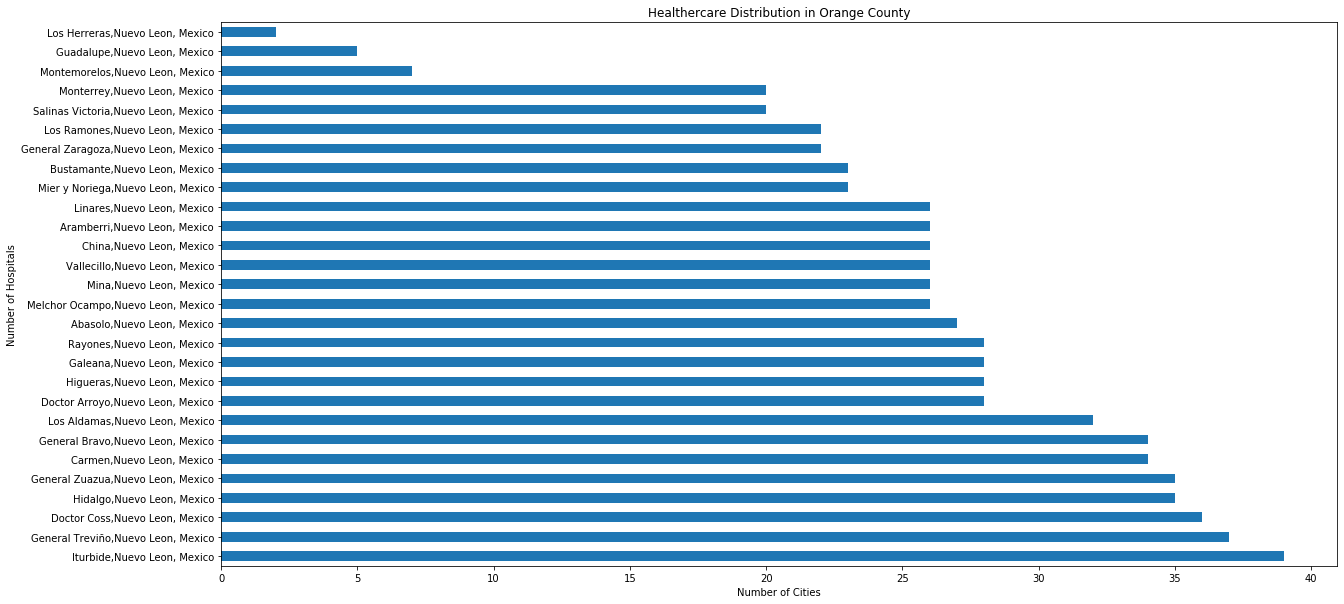

In [24]:
# Create bar chart to visualize the hospital distributions in Orange County
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

city_name = local_hospitals['City'].value_counts().to_list()

local_hospitals['City'].value_counts().plot(kind='barh', figsize=(20,10))
plt.pyplot.title('Healthercare Distribution in Orange County') 
plt.pyplot.ylabel('Number of Hospitals')
plt.pyplot.xlabel('Number of Cities') 

plt.pyplot.show()

## 8. Visualize Local Hospitals with Folium

In [25]:
hos_map = folium.Map(location=[mty_lat, mty_lng], zoom_start=11)

# add markers to map
for lat, lng, label in zip(local_hospitals['Hospital Latitude'], 
                           local_hospitals['Hospital Longitude'], 
                           local_hospitals['Hospital']):
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(hos_map)  
    
hos_map

In [26]:
# Create a new dataframe by merging the two tables 
# One for city total cases and one for local hospitals, for K-means clustering

df_merged = df.join(local_hospitals.set_index(['City', 'City Latitude', 'City Longitude']), 
                    on = ['City', 'City Latitude', 'City Longitude'])
df_merged = df_merged.reset_index(drop = True)
df_merged.head(100)

,City,cve_ent,poblacion,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,26-07-2020,Total,Fecha de creación,City Latitude,City Longitude,Risk Level,Hospital,Hospital Latitude,Hospital Longitude,Categories
0,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,0,113,7300.0,25.700329,-100.355472,Low Risk,Hospital Secc 50,25.709606,-100.347630,Hospital
1,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,0,113,7300.0,25.700329,-100.355472,Low Risk,Doctors Hospital,25.684624,-100.356103,Hospital
2,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,0,113,7300.0,25.700329,-100.355472,Low Risk,Hospital Universitario (UANL),25.689161,-100.350291,Hospital
3,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,0,113,7300.0,25.700329,-100.355472,Low Risk,Tococirugía (Hospital Universitario),25.688944,-100.349464,Hospital
4,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,0,113,7300.0,25.700329,-100.355472,Low Risk,"Centro de Fototerapia, Láser e Investigación C...",25.689218,-100.349863,Hospital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Carmen,Nuevo Leon, Mexico",4003,275478,0,0,0,0,0,0,0,...,0,1456,1852.0,25.670000,-100.357590,Medium Risk,Hospital Santa Rita,25.669244,-100.350429,Hospital
96,"Carmen,Nuevo Leon, Mexico",4003,275478,0,0,0,0,0,0,0,...,0,1456,1852.0,25.670000,-100.357590,Medium Risk,Hospital San Jose Delta,25.667916,-100.349203,Hospital
97,"Carmen,Nuevo Leon, Mexico",4003,275478,0,0,0,0,0,0,0,...,0,1456,1852.0,25.670000,-100.357590,Medium Risk,Centro Universitario de Imagen Diagnóstica (Ho...,25.690265,-100.349544,Hospital
98,"Carmen,Nuevo Leon, Mexico",4003,275478,0,0,0,0,0,0,0,...,0,1456,1852.0,25.670000,-100.357590,Medium Risk,Hospital San Lucas,25.668201,-100.350172,Hospital


In [27]:
# Create a new dataframe by merging the two tables 
# One for city total cases and one for local hospitals, for K-means clustering

df_merged = df.join(local_hospitals.set_index(['City', 'City Latitude', 'City Longitude']), 
                    on = ['City', 'City Latitude', 'City Longitude'])
df_merged = df_merged.reset_index(drop = True)
df_merged.head()

,City,cve_ent,poblacion,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,26-07-2020,Total,Fecha de creación,City Latitude,City Longitude,Risk Level,Hospital,Hospital Latitude,Hospital Longitude,Categories
0,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,0,113,7300.0,25.700329,-100.355472,Low Risk,Hospital Secc 50,25.709606,-100.347630,Hospital
1,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,0,113,7300.0,25.700329,-100.355472,Low Risk,Doctors Hospital,25.684624,-100.356103,Hospital
2,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,0,113,7300.0,25.700329,-100.355472,Low Risk,Hospital Universitario (UANL),25.689161,-100.350291,Hospital
3,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,0,113,7300.0,25.700329,-100.355472,Low Risk,Tococirugía (Hospital Universitario),25.688944,-100.349464,Hospital
4,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,0,113,7300.0,25.700329,-100.355472,Low Risk,"Centro de Fototerapia, Láser e Investigación C...",25.689218,-100.349863,Hospital


In [28]:

# Let's create a new dataframe that only contains numerical information
df1 = df_merged.drop(['Hospital Latitude', 'Hospital Longitude', 'Hospital', 'Categories'], 1). drop_duplicates()

# Reorder our new dataframe and show the number of hospitals accordingly
df_new = pd.merge(df1, df_hos, on='City')

print(df_new.shape)
df_new.head()

(28, 206)


,City,cve_ent,poblacion,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,23-07-2020,24-07-2020,25-07-2020,26-07-2020,Total,Fecha de creación,City Latitude,City Longitude,Risk Level,Number of Hospitals
0,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,1,2,0,0,113,7300.0,25.700329,-100.355472,Low Risk,27
1,"Aramberri,Nuevo Leon, Mexico",19007,17800,0,0,0,0,0,0,0,...,0,0,0,0,17,1877.0,25.644610,-100.295850,Low Risk,26
2,"Bustamante,Nuevo Leon, Mexico",47014,12830,0,0,0,0,0,0,0,...,0,0,0,0,8,3664.0,25.737521,-100.333534,Low Risk,23
3,"Carmen,Nuevo Leon, Mexico",4003,275478,0,0,0,0,0,0,0,...,12,10,0,0,1456,1852.0,25.670000,-100.357590,Medium Risk,34
4,"China,Nuevo Leon, Mexico",19013,11962,0,0,0,0,0,0,0,...,0,0,0,0,43,1825.0,25.644610,-100.295850,Low Risk,26


In [29]:
df_new = df_new[['City','poblacion','Total', 'City Latitude', 'City Longitude','Risk Level','Number of Hospitals']] 
df_new

,City,poblacion,Total,City Latitude,City Longitude,Risk Level,Number of Hospitals
0,"Abasolo,Nuevo Leon, Mexico",112397,113,25.700329,-100.355472,Low Risk,27
1,"Aramberri,Nuevo Leon, Mexico",17800,17,25.644610,-100.295850,Low Risk,26
2,"Bustamante,Nuevo Leon, Mexico",12830,8,25.737521,-100.333534,Low Risk,23
3,"Carmen,Nuevo Leon, Mexico",275478,1456,25.670000,-100.357590,Medium Risk,34
4,"China,Nuevo Leon, Mexico",11962,43,25.644610,-100.295850,Low Risk,26
5,"Doctor Arroyo,Nuevo Leon, Mexico",37859,59,25.730665,-100.330205,Low Risk,28
6,"Doctor Coss,Nuevo Leon, Mexico",1845,3,25.709449,-100.302903,Low Risk,36
7,"Galeana,Nuevo Leon, Mexico",52045,86,25.731355,-100.331755,Low Risk,28
8,"General Bravo,Nuevo Leon, Mexico",6127,46,25.665535,-100.335940,Low Risk,34
9,"General Treviño,Nuevo Leon, Mexico",1194,5,25.688640,-100.307930,Low Risk,37


In [30]:
df_new['Total'] = df_new['Total'].astype(int)
df_new.dtypes

df_new['Total_z'] = (df_new['Total'] - df_new['Total'].mean())/df_new['Total'].std(ddof=0)
df_new['Hospitals_z'] = (df_new['Number of Hospitals'] - df_new['Number of Hospitals'].mean())/df_new['Number of Hospitals'].std(ddof=0)

df_new['Hardship Index'] = df_new['Total_z']/df_new['Hospitals_z']

print(df_new.shape)
df_new.head(10)

(28, 10)


,City,poblacion,Total,City Latitude,City Longitude,Risk Level,Number of Hospitals,Total_z,Hospitals_z,Hardship Index
0,"Abasolo,Nuevo Leon, Mexico",112397,113,25.700329,-100.355472,Low Risk,27,-0.250980,0.140028,-1.792357
1,"Aramberri,Nuevo Leon, Mexico",17800,17,25.644610,-100.295850,Low Risk,26,-0.347137,0.028006,-12.395265
2,"Bustamante,Nuevo Leon, Mexico",12830,8,25.737521,-100.333534,Low Risk,23,-0.356152,-0.308062,1.156105
3,"Carmen,Nuevo Leon, Mexico",275478,1456,25.670000,-100.357590,Medium Risk,34,1.094211,0.924185,1.183974
4,"China,Nuevo Leon, Mexico",11962,43,25.644610,-100.295850,Low Risk,26,-0.321094,0.028006,-11.465364
5,"Doctor Arroyo,Nuevo Leon, Mexico",37859,59,25.730665,-100.330205,Low Risk,28,-0.305068,0.252050,-1.210346
6,"Doctor Coss,Nuevo Leon, Mexico",1845,3,25.709449,-100.302903,Low Risk,36,-0.361160,1.148230,-0.314536
7,"Galeana,Nuevo Leon, Mexico",52045,86,25.731355,-100.331755,Low Risk,28,-0.278024,0.252050,-1.103050
8,"General Bravo,Nuevo Leon, Mexico",6127,46,25.665535,-100.335940,Low Risk,34,-0.318090,0.924185,-0.344184
9,"General Treviño,Nuevo Leon, Mexico",1194,5,25.688640,-100.307930,Low Risk,37,-0.359156,1.260252,-0.284988


In [31]:

# Generate 3 clusters by categorizing total cases
clusters = np.linspace(min(df_new['Hardship Index']), max(df_new['Hardship Index']), 4)

# Cluster into groups
cluster_names = ['1', '2', '3']
df_new['Healthcare Capacity'] = pd.cut(df_new['Hardship Index'], clusters, 
                                       labels=cluster_names, include_lowest=True )
df_new.head()

,City,poblacion,Total,City Latitude,City Longitude,Risk Level,Number of Hospitals,Total_z,Hospitals_z,Hardship Index,Healthcare Capacity
0,"Abasolo,Nuevo Leon, Mexico",112397,113,25.700329,-100.355472,Low Risk,27,-0.250980,0.140028,-1.792357,3
1,"Aramberri,Nuevo Leon, Mexico",17800,17,25.644610,-100.295850,Low Risk,26,-0.347137,0.028006,-12.395265,1
2,"Bustamante,Nuevo Leon, Mexico",12830,8,25.737521,-100.333534,Low Risk,23,-0.356152,-0.308062,1.156105,3
3,"Carmen,Nuevo Leon, Mexico",275478,1456,25.670000,-100.357590,Medium Risk,34,1.094211,0.924185,1.183974,3
4,"China,Nuevo Leon, Mexico",11962,43,25.644610,-100.295850,Low Risk,26,-0.321094,0.028006,-11.465364,1


## 9.Clustering

In [32]:
# Cluster 1: 
df_new[df_new['Healthcare Capacity'] == '1']

,City,poblacion,Total,City Latitude,City Longitude,Risk Level,Number of Hospitals,Total_z,Hospitals_z,Hardship Index,Healthcare Capacity
1,"Aramberri,Nuevo Leon, Mexico",17800,17,25.644610,-100.295850,Low Risk,26,-0.347137,0.028006,-12.395265,1
4,"China,Nuevo Leon, Mexico",11962,43,25.644610,-100.295850,Low Risk,26,-0.321094,0.028006,-11.465364,1
22,"Mina,Nuevo Leon, Mexico",5882,2,25.639307,-100.301273,Low Risk,26,-0.362161,0.028006,-12.931746,1
27,"Vallecillo,Nuevo Leon, Mexico",1942,2,25.644610,-100.295850,Low Risk,26,-0.362161,0.028006,-12.931746,1


In [33]:
# Cluster 2: 
df_new[df_new['Healthcare Capacity'] == '2']

,City,poblacion,Total,City Latitude,City Longitude,Risk Level,Number of Hospitals,Total_z,Hospitals_z,Hardship Index,Healthcare Capacity
16,"Linares,Nuevo Leon, Mexico",88689,206,25.644610,-100.295850,Low Risk,26,-0.157829,0.028006,-5.635605,2
20,"Melchor Ocampo,Nuevo Leon, Mexico",65355,220,25.701504,-100.358612,Low Risk,26,-0.143806,0.028006,-5.134889,2
24,"Monterrey,Nuevo Leon, Mexico",1124835,4688,25.631991,-100.286160,Extreme High Risk,20,4.331484,-0.644129,-6.724561,2


In [34]:
# Cluster 3: 
df_new[df_new['Healthcare Capacity'] == '3']

,City,poblacion,Total,City Latitude,City Longitude,Risk Level,Number of Hospitals,Total_z,Hospitals_z,Hardship Index,Healthcare Capacity
0,"Abasolo,Nuevo Leon, Mexico",112397,113,25.700329,-100.355472,Low Risk,27,-0.250980,0.140028,-1.792357,3
2,"Bustamante,Nuevo Leon, Mexico",12830,8,25.737521,-100.333534,Low Risk,23,-0.356152,-0.308062,1.156105,3
3,"Carmen,Nuevo Leon, Mexico",275478,1456,25.670000,-100.357590,Medium Risk,34,1.094211,0.924185,1.183974,3
5,"Doctor Arroyo,Nuevo Leon, Mexico",37859,59,25.730665,-100.330205,Low Risk,28,-0.305068,0.252050,-1.210346,3
6,"Doctor Coss,Nuevo Leon, Mexico",1845,3,25.709449,-100.302903,Low Risk,36,-0.361160,1.148230,-0.314536,3
7,"Galeana,Nuevo Leon, Mexico",52045,86,25.731355,-100.331755,Low Risk,28,-0.278024,0.252050,-1.103050,3
8,"General Bravo,Nuevo Leon, Mexico",6127,46,25.665535,-100.335940,Low Risk,34,-0.318090,0.924185,-0.344184,3
9,"General Treviño,Nuevo Leon, Mexico",1194,5,25.688640,-100.307930,Low Risk,37,-0.359156,1.260252,-0.284988,3
10,"General Zaragoza,Nuevo Leon, Mexico",6604,3,25.738271,-100.336300,Low Risk,22,-0.361160,-0.420084,0.859732,3
11,"General Zuazua,Nuevo Leon, Mexico",91913,88,25.680360,-100.307908,Low Risk,35,-0.276021,1.036207,-0.266376,3


## Final Data Visualization

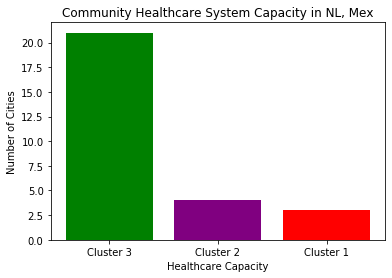

In [35]:
# Create bar chart to visualize the overal healthcare system capacity in NL
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(['Cluster 3', 'Cluster 2', 'Cluster 1'], df_new["Healthcare Capacity"].value_counts(), color = ('green', 'purple', 'r'))


plt.pyplot.title('Community Healthcare System Capacity in NL, Mex') 
plt.pyplot.ylabel('Number of Cities')
plt.pyplot.xlabel('Healthcare Capacity') 

plt.pyplot.show()


## Conclusion

We can find that healthcare in NL based on the number of hospitals is cover by 80%, neverless we still dont have the capacity of each of this hospitals, there is no data of public hospital that visualize this info. 

Furthermore we can see how the cities are cluster based on System Capacity, also there is more data we can use to see graphs on how he curve is moving for each of this cities.
I try to look for a project with Mexico data but there is almost not public info in almost all the Fields
